<a href="https://colab.research.google.com/github/MauricioAlejandroDiazBarrera/InteligenciaArtificialV2/blob/main/Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Examen del modulo Inteligencia Artificial**

# 1. Regresión

### ¿Qué es un problema de regresión?

5 pts

Respuesta

Es un problema que implica predecir un valor numérico basados en los datos que le proporcionamos intentando encontrar una correlacion.

### Da dos ejemplos de un problema de regresión

20 pts

1

In [4]:
import pandas as pandas
import matplotlib.pyplot as plt

dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets possum/possum.csv")
dataset.head()

dataset.info()

dataset = dataset.dropna()
dataset.columns

X = dataset.drop(["case", "site", "Pop", "sex", "age"], axis=1)

y = dataset["age"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=44)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(r2_score(y_test,predictions))
print(predictions)

from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=predictions)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=predictions) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=predictions,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(model, feature_names=X.columns)

NameError: ignored

2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Leer el archivo CSV en un DataFrame, especificando el separador de columnas (;)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSets LOL season 13/League of Legends Champion Stats 13.13.csv', sep=';')

# Eliminar el carácter '%' de las columnas numéricas
numeric_columns = ['Score', 'Trend', 'Win %', 'Role %', 'Pick %', 'Ban %', 'KDA']
df[numeric_columns] = df[numeric_columns].replace({'%': ''}, regex=True).astype(float)

# Convertir las etiquetas de clase (Roles) a valores numéricos
le = LabelEncoder()
df['Role'] = le.fit_transform(df['Role'])

# Seleccionar las características (features) y la variable objetivo (target)
X = df[['Score', 'Trend', 'Win %', 'Role %', 'Pick %', 'Ban %', 'KDA']]
y = df['Role']
# Crear un modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(X, y)

# Realizar predicciones con el modelo
y_pred = model.predict(X)

# Calcular el error absoluto medio
mae = mean_absolute_error(y, y_pred)
print("Error absoluto medio:", mae)

# Calcular el coeficiente de determinación R²
r2 = r2_score(y, y_pred)
print("Coeficiente de determinación R²:", r2)

# Calcular el error cuadrático medio
mse = mean_squared_error(y, y_pred)
print("Error cuadrático medio:", mse)

# Calcular el error cuadrático medio con squared=False (raíz del error cuadrático medio)
rmse = mean_squared_error(y, y_pred, squared=False)
print("Raíz del error cuadrático medio:", rmse)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Tomando en cuenta la base de datos que utilizaste para tu proyecto, y otra mas que se utilizo en clase (la que mas te haya gustado o llamado la atencion), ejemplifica dos problemas de regresion, argumentando cual es su resultado, si es bueno o malo, y utilizando las metricas de evaluacion correctas.

# 2. Clasificación

### ¿Qué es un problema de clasificación?

5 pts

En base a los datos que le proporcionamos, intenta averiguar que "etiqueta" tiene que llevar el objeto u cosa que le estamos presentando.

### Da dos ejemplos de un problema de clasificación

20 pts

1

Precisión del clasificador Naive Bayes: 0.7598425196850394
Actual Value: 0
Predicted Value: 0
Accuracy: 0.7598425196850394
F1 Score: 0.7553458441464925


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


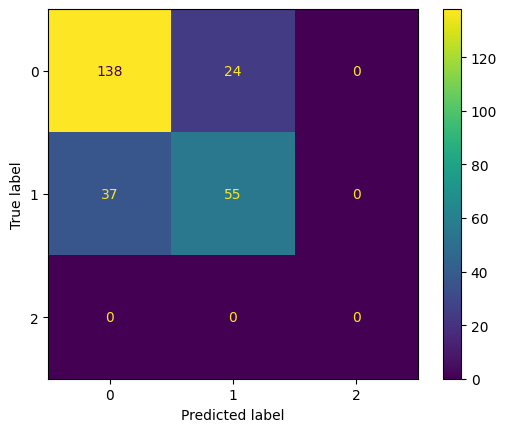

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import pandas as pd

# Cargar el conjunto de datos de diabetes
pima = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSets Diabetes/diabetes.csv")

# Dividir los datos en características (X) y etiquetas (y)
X = pima.drop("Outcome", axis=1)
y = pima["Outcome"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Crear y entrenar el clasificador Naive Bayes (GaussianNB)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = classifier.predict(X_test)

# Evaluar la precisión del clasificador
accuracy = (y_test == y_pred).mean()
print("Precisión del clasificador Naive Bayes:", accuracy)


# Build a Gaussian Classifier
model = GaussianNB()

# Model training
model.fit(X_train, y_train)

# Predict Output for the 7mo ejemplo (índice 6) en X_test
predicted = model.predict([X_test.iloc[6]])

print("Actual Value:", y_test.iloc[6])
print("Predicted Value:", predicted[0])

from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)
labels = [0,1,2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot();


2

In [ ]:
import pandas as pd

pima = pd.read_csv("/content/drive/MyDrive/Datasets/Datos_curso/diabetes.csv")

pima.head()

pima.columns

#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Tomando en cuenta la base de datos que utilizaste para tu proyecto, y otra mas que se utilizo en clase (la que mas te haya gustado o llamado la atencion), ejemplifica dos problemas de regresion, argumentando cual es su resultado, si es bueno o malo, y utilizando las metricas de evaluacion correctas.

# 3. Agrupamiento

### ¿Qué es un problema de agrupamiento?

5 pts

es un tipo de problema en el que el objetivo es dividir un conjunto de datos en grupos o clusters basados en similitudes entre las instancias. el objetivo es encontrar patrones y estructuras en los datos para agrupar elementos similares en conjuntos separados.

### Da al menos un ejemplo de un problema de agrupamiento

15 pts

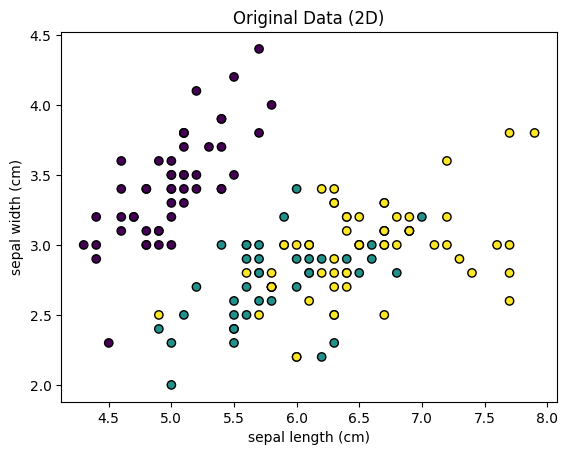

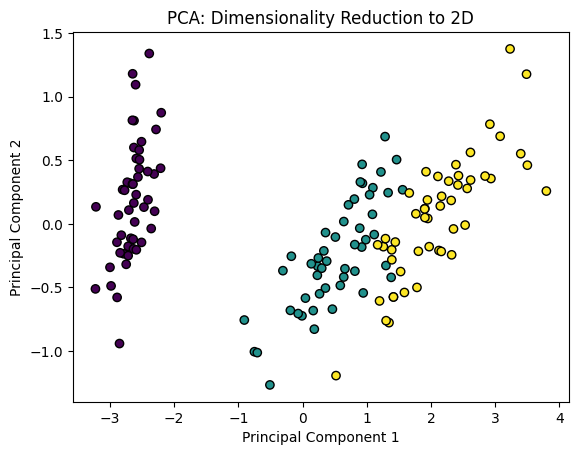

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

#Cargamos el dataset de Iris con el que trabajamos la clase pasada
iris = load_iris()
X, y = iris.data, iris.target

# Tomamos la libreria de PCA de Sklearn y la utilizamos para reduccion de caracteristicas
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Imprimimos los datos originales en 2D
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Original Data (2D)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()


#PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('PCA: Dimensionality Reduction to 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

Respuesta: Explica primero con palabras un ejemplo en el cual utilizar un modelo de agrupamiento pueda ayudarte a resolver un problema. Despues, utilizando cualquiera de las bases de datos que utilizamos en clase, ejemplifica el uso de un modelo de agrupamiento.

### ¿Como funciona el algoritmo de k-medias?

10 pts

Respuesta: Menciona el funcionamiento del algoritmo, y menciona al menos un escenario en el que este modelo pueda ayudarte. (puedes mencionar alguna de las bases de datos que usaste en clase, y no es necesario que codifiques)

algoritmo de agrupamiento que busca dividir un conjunto de datos en un número predefinido de grupos. tiende a converger a una solución en la que los puntos dentro de cada cluster son similares entre sí y diferentes de los puntos en otros clusters

Donde podemos usar el algoritmo: Con un ejemplo que vimos en clase respecto a la base de datos "iris" teniendo una base de datos con información sobre diferentes características de flores, como longitud de pétalos y sépalos. Si deseas agrupar las flores en diferentes tipos en función de estas características, el algoritmo de K-medias podría ser útil.
Por ejemplo: utilizando la famosa base de datos "Iris" que contiene medidas de tres especies de flores, el algoritmo podría agrupar las flores en diferentes clústeres basados en sus características de longitud y ancho de pétalos y sépalos, lo que ayudaría a comprender mejor las similitudes y diferencias entre las especies de flores.

# 4. Reducción de dimensiones

### ¿Cuál es el objetivo de la reducción de dimensiones?

10 pts

Respuesta: Mencionar el objetivo principal de este metodo y agregar un escenario en el que es necesario utilizarlo.

El objetivo principal de la reducción de dimensiones, simplificar y transformar datos complejos y de alta dimensionalidad en un espacio menor para que sea mas facil de estudiar y utilizar, mientras se conserva la mayor cantidad posible de información relevante. Esto se logra eliminando características redundantes, ruidosas o irrelevantes, lo que puede llevar a una representación más compacta y eficiente de los datos.

Puede ser util para trabajar con imagenes las cuales tienen muchos pixeles y muchos de estos tienen informacion incesaria.

### ¿Como funciona el algoritmo de PCA?

10 pts

Respuesta: Solo menciona con tus propias palabras como funciona este algoritmo, no es necesario que lo codifiques



es una técnica que nos ayuda a manejar conjuntos de datos complejos y de alta dimensionalidad al encontrar nuevas dimensiones que capturan la mayor variación en los datos originales. Funciona con varios pasos: Estandarización de datos, Cálculo de la matriz de covarianza, Cálculo de los autovectores y autovalores, Selección de componentes principales y finalmente la Proyección de datos.

#Extra puntos:

- Menciona con tus propias palabras, cual es la diferencia entre el aprendizaje supervisado y no supervisado. (2 pts)

Respuesta: En uno supervisado nosotros damos datos con clasificacion en donde le decimos al programa que son los datos y en uno no supervisado le damos los datos sin clasificar y esta se encargara de interpretar los datos

- Menciona en que casos es apropiado utilizar ambos modelos (Puedes ejemplificar con un problema visto en clase) (2 pts)

Aprendizaje Supervisado: apropiado cuando se desea predecir una salida específica a partir de entradas dadas.

Aprendizaje No Supervisado: apropiado cuando se busca explorar causas o simulitudes en los datos sin tener etiquetas claras.